In [79]:
import dotenv
import pandas as pd
from eodhd import APIClient
import os

dotenv.load_dotenv(dotenv_path="../.env")

True

In [80]:
api_key = os.environ.get("EODHD_API_KEY")
api = APIClient(api_key)

In [81]:
resp = api.get_historical_market_capitalization_data(
    ticker='AAPL.US',
    from_date='2015-01-01',
    to_date='2024-07-16'
)

In [82]:
mkt_df = pd.DataFrame(resp).T.set_index('date')

<Axes: xlabel='date'>

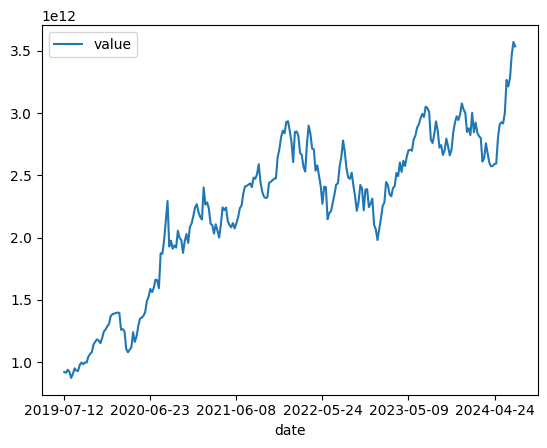

In [83]:
mkt_df.plot()

In [84]:
price_resp = api.get_historical_data(
    symbol='AAPL.US',
    interval='d',
    iso8601_start='2015-01-01',
    iso8601_end='2024-07-15'
)

In [85]:
price_resp

,symbol,interval,open,high,low,close,adjusted_close,volume
date,,,,,,,,
2015-01-02,AAPL.US,d,111.39000000,111.44000000,107.35000000,109.33000000,24.40220000,212818400
2015-01-05,AAPL.US,d,108.29000000,108.65000000,105.41000000,106.25000000,23.71470000,257142000
2015-01-06,AAPL.US,d,106.54000000,107.43000000,104.63000000,106.26000000,23.71700000,263188400
2015-01-07,AAPL.US,d,107.20000000,108.20000000,106.70000000,107.75000000,24.04950000,160423600
2015-01-08,AAPL.US,d,109.23000000,112.15000000,108.70000000,111.89000000,24.97360000,237458000
...,...,...,...,...,...,...,...,...
2024-07-09,AAPL.US,d,227.93000000,229.40000000,226.37000000,228.68000000,228.68000000,48076100
2024-07-10,AAPL.US,d,229.30000000,233.08000000,229.25000000,232.98000000,232.98000000,62627700
2024-07-11,AAPL.US,d,231.39000000,232.39000000,225.77000000,227.57000000,227.57000000,64710600


In [86]:
fund_df = api.get_fundamentals_data(
    ticker='AAPL.US',
)

In [87]:
price_split_adjusted = api.get_technical_indicator_data(
    ticker='AAPL.US',
    function='splitadjusted',
    agg_period='d',
    date_from='2015-01-01',
    date_to='2024-07-15'
)

In [88]:
price_split_adjusted_df = pd.DataFrame(price_split_adjusted)

In [89]:
price_split_adjusted_df['date'] = pd.to_datetime(price_split_adjusted_df['date'])

In [90]:
shares_df = pd.DataFrame(fund_df['outstandingShares']['quarterly']).T
shares_df['dateFormatted'] = pd.to_datetime(shares_df['dateFormatted'])

In [91]:
shares_df

,date,dateFormatted,sharesMln,shares
0,2024-Q1,2024-03-31,15464.7090,15464709000
1,2023-Q4,2023-12-31,15576.6410,15576641000
2,2023-Q3,2023-09-30,15672.4000,15672400000
3,2023-Q2,2023-06-30,15775.0210,15775021000
4,2023-Q1,2023-03-31,15847.0500,15847050000
...,...,...,...,...
150,1986-Q3,1986-09-30,14260.0640,14260064000
151,1986-Q2,1986-06-30,14260.0640,14260064000
152,1986-Q1,1986-03-31,14033.6000,14033600000
153,1985-Q4,1985-12-31,13837.8240,13837824000


In [92]:
price_df = price_split_adjusted_df.merge(shares_df[['dateFormatted', 'shares']], left_on='date',
                                          right_on='dateFormatted', how='left').ffill()

<Axes: >

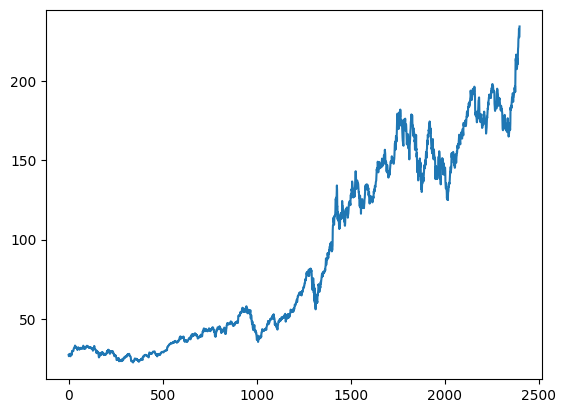

In [93]:
price_df['close'].plot()

<Axes: >

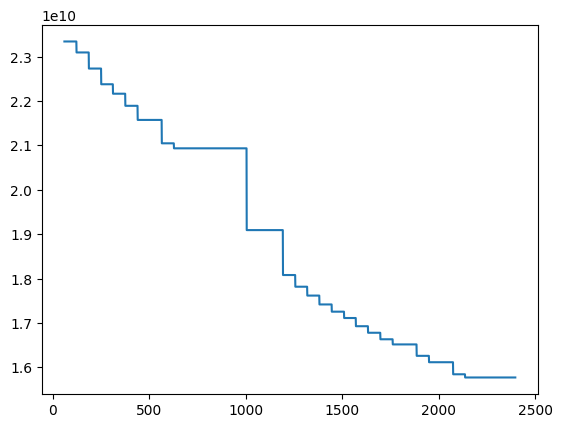

In [94]:
price_df['shares'].plot()

In [95]:
price_df['market_cap'] = price_df['shares'] * price_df['close']

<Axes: >

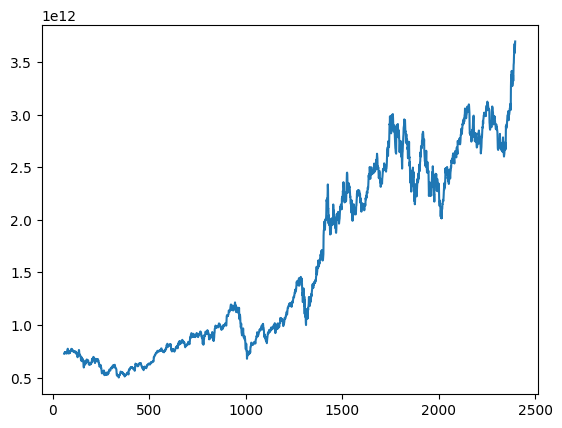

In [96]:
price_df['market_cap'].plot()

In [97]:
price_df[['date', 'market_cap']]

,date,market_cap
0,2015-01-02,NaN
1,2015-01-05,NaN
2,2015-01-06,NaN
3,2015-01-07,NaN
4,2015-01-08,NaN
...,...,...
2393,2024-07-09,3607431802280.00000000
2394,2024-07-10,3675264392580.00000000
2395,2024-07-11,3589921528970.00000000
2396,2024-07-12,3636773341340.00000000


In [98]:
shares_df

,date,dateFormatted,sharesMln,shares
0,2024-Q1,2024-03-31,15464.7090,15464709000
1,2023-Q4,2023-12-31,15576.6410,15576641000
2,2023-Q3,2023-09-30,15672.4000,15672400000
3,2023-Q2,2023-06-30,15775.0210,15775021000
4,2023-Q1,2023-03-31,15847.0500,15847050000
...,...,...,...,...
150,1986-Q3,1986-09-30,14260.0640,14260064000
151,1986-Q2,1986-06-30,14260.0640,14260064000
152,1986-Q1,1986-03-31,14033.6000,14033600000
153,1985-Q4,1985-12-31,13837.8240,13837824000


In [99]:
mkt_df

,value
date,
2019-07-12,921232603500
2019-07-19,915540676200
2019-07-26,938814453200
2019-08-02,922003103600
2019-08-05,873738261200
...,...
2024-06-20,3215250313800
2024-06-27,3283026956200
2024-07-05,3470716119900


In [100]:
price_split_adjusted_df['close']

0       27.33250000
1       26.56250000
2       26.56500000
3       26.93750000
4       27.97250000
           ...     
2393   228.68000000
2394   232.98000000
2395   227.57000000
2396   230.54000000
2397   234.40000000
Name: close, Length: 2398, dtype: float64

# Calculating Raw Shares

In [101]:
splits_df = pd.DataFrame(api.get_historical_splits_data(ticker='AAPL'))
splits_df['date'] = pd.to_datetime(splits_df['date'])

In [102]:
splits_df['splitFactor'] = splits_df['split'].apply(lambda x: eval(x))

In [103]:
def cumulative_division(series):
    return series.expanding().apply(lambda x: x.iloc[0] / x.iloc[-1])

In [104]:
splits_df = splits_df.sort_values('date', ascending=False)
splits_df['cumulativeSplitfactor'] = splits_df['splitFactor'].cumprod()

In [105]:
import datetime as dt
splits_df['date'].min() - dt.timedelta(days=1)

Timestamp('1987-06-15 00:00:00')

In [106]:
df  = shares_df[['dateFormatted', 'shares']].rename(columns={'dateFormatted': 'date'}).merge(splits_df, how='outer', left_on='date', right_on='date')

In [107]:
df = df.sort_values('date').bfill().fillna(1)

In [108]:
df['rawShares'] = df['shares'] / df['cumulativeSplitfactor']

In [116]:
merged_df = price_resp.reset_index().merge(df[['date', 'rawShares']], how='outer')

In [120]:
merged_df = merged_df.sort_values('date').ffill().dropna()

In [130]:
merged_df['market_cap'] = merged_df['close'] * merged_df['rawShares']

In [131]:
merged_df[['date', 'market_cap']]

,date,market_cap
0,2015-01-02,643057521990.00000000
1,2015-01-05,624941568750.00000000
2,2015-01-06,625000386780.00000000
3,2015-01-07,633764273250.00000000
4,2015-01-08,658114937670.00000000
...,...,...
2393,2024-07-09,3536469654120.00000000
2394,2024-07-10,3602967902820.00000000
2395,2024-07-11,3519303827130.00000000
2396,2024-07-12,3565234012860.00000000


<Axes: >

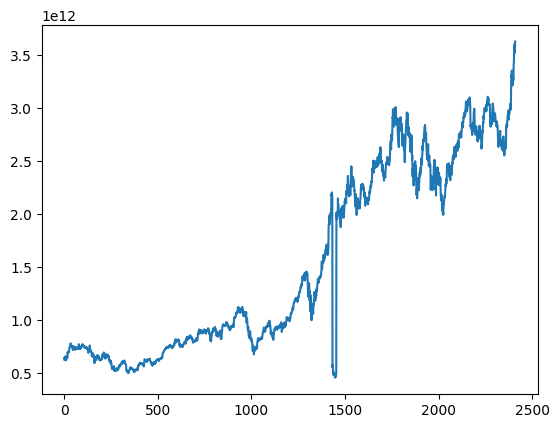

In [134]:
merged_df.reset_index()['market_cap'].plot()

In [132]:
mkt_df

,value
date,
2019-07-12,921232603500
2019-07-19,915540676200
2019-07-26,938814453200
2019-08-02,922003103600
2019-08-05,873738261200
...,...
2024-06-20,3215250313800
2024-06-27,3283026956200
2024-07-05,3470716119900
